In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform (low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform (low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitiudes and longitutdes to a list. 
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities. append(city)
        
 #Print the city count to confirm sufficient count.
len(cities)

615

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | rungata
City not found. Skipping...
Processing Record 3 of Set 1 | aklavik
Processing Record 4 of Set 1 | zemen
Processing Record 5 of Set 1 | port-cartier
Processing Record 6 of Set 1 | tual
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | saint anthony
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | gizo
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | adeje
Processing Record 14 of Set 1 | kudahuvadhoo
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | san cristobal
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | thoen
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | leningradskiy
Processing Record 22 of Set 1 | methoni
Processing Recor

Processing Record 37 of Set 4 | dublin
Processing Record 38 of Set 4 | haines junction
Processing Record 39 of Set 4 | abu dhabi
Processing Record 40 of Set 4 | teya
Processing Record 41 of Set 4 | play cu
City not found. Skipping...
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | turbat
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | cozumel
Processing Record 47 of Set 4 | jizan
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | colares
Processing Record 50 of Set 4 | yerbogachen
Processing Record 1 of Set 5 | iqaluit
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | port hedland
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | anlu
Processing Record 7 of Set 5 | bredasdorp
Processing Record 8 of Set 5 | nakhon si thammarat
Processing Record 9 of Set 5 | broome
Processing Record 10 o

Processing Record 24 of Set 8 | stalowa wola
Processing Record 25 of Set 8 | greenlaw
Processing Record 26 of Set 8 | mantua
Processing Record 27 of Set 8 | noumea
Processing Record 28 of Set 8 | preobrazheniye
Processing Record 29 of Set 8 | hirara
Processing Record 30 of Set 8 | acarau
Processing Record 31 of Set 8 | kindu
Processing Record 32 of Set 8 | lebu
Processing Record 33 of Set 8 | khonuu
City not found. Skipping...
Processing Record 34 of Set 8 | kirs
Processing Record 35 of Set 8 | marrakesh
Processing Record 36 of Set 8 | soure
Processing Record 37 of Set 8 | rincon
Processing Record 38 of Set 8 | totskoye
Processing Record 39 of Set 8 | khandyga
Processing Record 40 of Set 8 | catamarca
Processing Record 41 of Set 8 | kichmengskiy gorodok
Processing Record 42 of Set 8 | shelburne
Processing Record 43 of Set 8 | simao
Processing Record 44 of Set 8 | saint-pierre
Processing Record 45 of Set 8 | leshukonskoye
Processing Record 46 of Set 8 | markova
Processing Record 47 of S

Processing Record 12 of Set 12 | isangel
Processing Record 13 of Set 12 | namatanai
Processing Record 14 of Set 12 | villazon
Processing Record 15 of Set 12 | nagato
Processing Record 16 of Set 12 | masty
Processing Record 17 of Set 12 | marienburg
Processing Record 18 of Set 12 | karaul
City not found. Skipping...
Processing Record 19 of Set 12 | amahai
Processing Record 20 of Set 12 | naze
Processing Record 21 of Set 12 | sedalia
Processing Record 22 of Set 12 | vitim
Processing Record 23 of Set 12 | puri
Processing Record 24 of Set 12 | nago
Processing Record 25 of Set 12 | esterhazy
Processing Record 26 of Set 12 | japura
Processing Record 27 of Set 12 | aksarka
Processing Record 28 of Set 12 | cavalcante
Processing Record 29 of Set 12 | vaasa
Processing Record 30 of Set 12 | poya
Processing Record 31 of Set 12 | jeremie
Processing Record 32 of Set 12 | jiuquan
Processing Record 33 of Set 12 | yasnyy
Processing Record 34 of Set 12 | ornskoldsvik
Processing Record 35 of Set 12 | leo

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,77.00,94,55,12.66,AU,2021-01-13 23:34:39
1,Aklavik,68.2191,-135.0107,-14.80,76,100,1.14,CA,2021-01-13 23:34:40
2,Zemen,42.4789,22.7492,32.00,80,75,12.66,BG,2021-01-13 23:34:40
3,Port-Cartier,50.0334,-66.8654,24.80,80,100,3.44,CA,2021-01-13 23:34:40
4,Tual,-5.6667,132.7500,84.51,75,100,11.72,ID,2021-01-13 23:34:40
5,Punta Arenas,-53.1500,-70.9167,53.60,76,90,17.27,CL,2021-01-13 23:34:40
6,Saint Anthony,45.0205,-93.2180,42.80,70,75,3.44,US,2021-01-13 23:34:40
7,Jamestown,42.0970,-79.2353,36.00,75,1,10.36,US,2021-01-13 23:34:35
8,Gizo,-8.1030,156.8419,85.42,69,87,11.59,SB,2021-01-13 23:34:40
9,Albany,42.6001,-73.9662,34.00,68,99,2.59,US,2021-01-13 23:34:14


In [8]:
citydata_reorder = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[citydata_reorder]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2021-01-13 23:34:39,-24.8667,113.6333,77.00,94,55,12.66
1,Aklavik,CA,2021-01-13 23:34:40,68.2191,-135.0107,-14.80,76,100,1.14
2,Zemen,BG,2021-01-13 23:34:40,42.4789,22.7492,32.00,80,75,12.66
3,Port-Cartier,CA,2021-01-13 23:34:40,50.0334,-66.8654,24.80,80,100,3.44
4,Tual,ID,2021-01-13 23:34:40,-5.6667,132.7500,84.51,75,100,11.72
5,Punta Arenas,CL,2021-01-13 23:34:40,-53.1500,-70.9167,53.60,76,90,17.27
6,Saint Anthony,US,2021-01-13 23:34:40,45.0205,-93.2180,42.80,70,75,3.44
7,Jamestown,US,2021-01-13 23:34:35,42.0970,-79.2353,36.00,75,1,10.36
8,Gizo,SB,2021-01-13 23:34:40,-8.1030,156.8419,85.42,69,87,11.59
9,Albany,US,2021-01-13 23:34:14,42.6001,-73.9662,34.00,68,99,2.59


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/13/21'

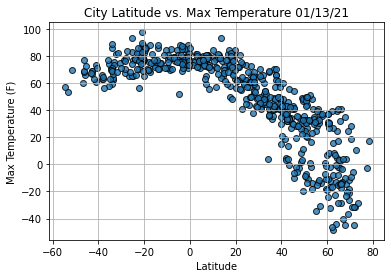

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

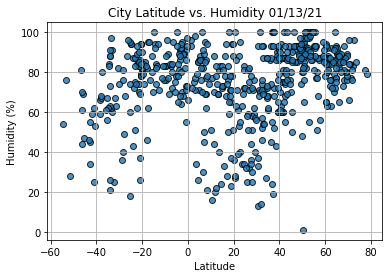

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

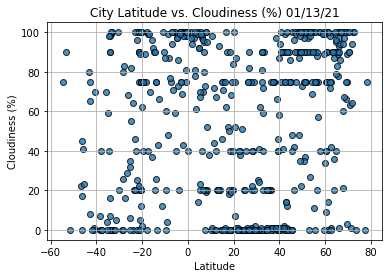

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

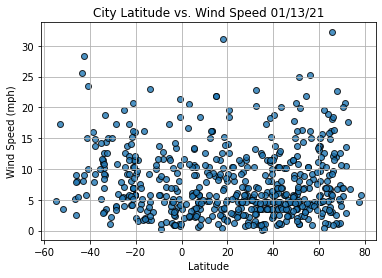

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-01-13 23:34:41
Lat                      -23.1203
Lng                      -134.969
Max Temp                    78.15
Humidity                       75
Cloudiness                     46
Wind Speed                  12.06
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
560    False
561     True
562     True
563     True
564    False
Name: Lat, Length: 565, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Aklavik,CA,2021-01-13 23:34:40,68.2191,-135.0107,-14.80,76,100,1.14
2,Zemen,BG,2021-01-13 23:34:40,42.4789,22.7492,32.00,80,75,12.66
3,Port-Cartier,CA,2021-01-13 23:34:40,50.0334,-66.8654,24.80,80,100,3.44
6,Saint Anthony,US,2021-01-13 23:34:40,45.0205,-93.2180,42.80,70,75,3.44
7,Jamestown,US,2021-01-13 23:34:35,42.0970,-79.2353,36.00,75,1,10.36
...,...,...,...,...,...,...,...,...,...
558,Taybad,IR,2021-01-13 23:36:12,34.7400,60.7756,36.36,68,0,0.87
559,Masallatah,LY,2021-01-13 23:36:13,32.6167,14.0000,54.21,69,59,20.24
561,Tibati,CM,2021-01-13 23:36:13,6.4667,12.6333,62.89,30,20,3.74
562,Aguimes,ES,2021-01-13 23:36:13,27.9054,-15.4461,61.00,72,40,8.05


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

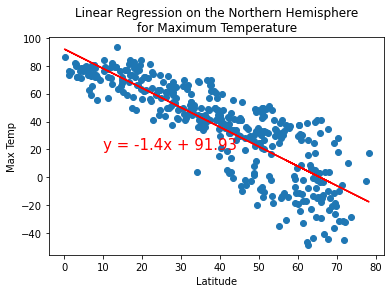

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' + "\n"
                        'for Maximum Temperature', 'Max Temp',(10,20))

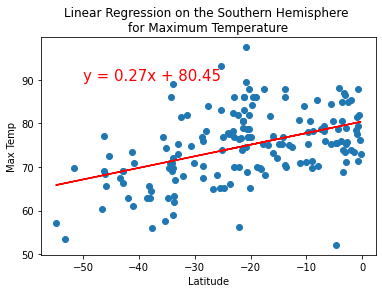

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere ' + "\n"
                        'for Maximum Temperature', 'Max Temp',(-50,90))

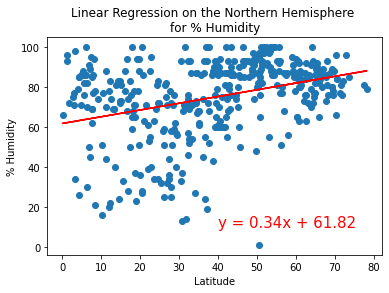

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere ' + "\n"
                        'for % Humidity', '% Humidity',(40,10))

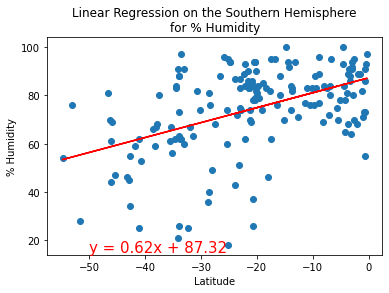

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' + "\n"
                        'for % Humidity', '% Humidity',(-50,15))

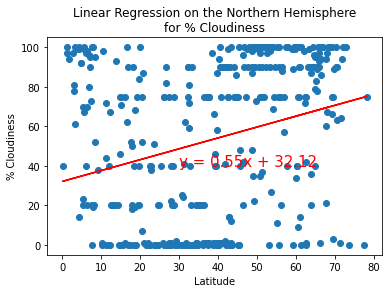

In [46]:
# SKILL DRILL 6.4.4
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' + "\n"
                        'for % Cloudiness', '% Cloudiness',(30,40))

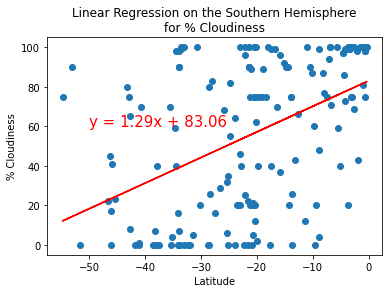

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'+ '\n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

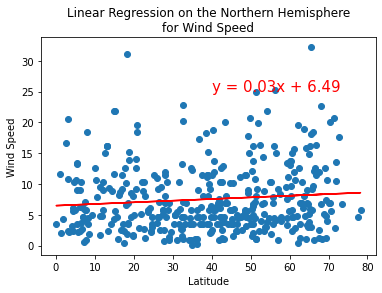

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'+'\n'
                        'for Wind Speed', 'Wind Speed',(40,25))

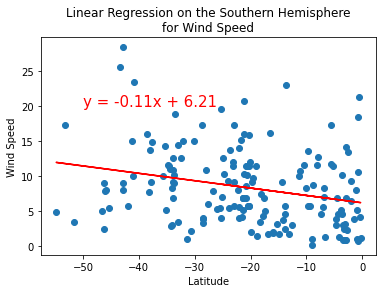

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'+'\n'
                        'for Wind Speed', 'Wind Speed',(-50,20))